In [25]:
# Standard Libraries
import os
import re
import subprocess
import traceback
import pickle
# import spacy
from collections import Counter

# Data Handling and Processing
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  

# Scikit-Learn: Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer


# Scikit-Learn: Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Scikit-Learn: Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Scikit-Learn: Class Weights
from sklearn.utils.class_weight import compute_class_weight

# Scikit-Learn: Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

# Transformers
from transformers import AutoModelForTokenClassification, AutoTokenizer
from transformers import pipeline  
from sentence_transformers import SentenceTransformer

# Torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

# Imbalanced Data Handling
from imblearn.combine import SMOTEENN

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Concatenate, BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer


import logging
from tqdm import tqdm


# Joblib (for saving/loading models)
import joblib

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/armandaraujo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [31]:
# First, let's read the dataset
healthCareMagic_df = pd.read_csv('Pivot_Resource/HealthCareMagic-100k.csv')


In [78]:
healthCareMagic_df.shape

(112165, 4)

In [122]:
medical_conditions = {
"abortion": "Abortion",
"abscess": "Dental Abscess",
"acne": "Acne Vulgaris",
"acid reflux":"acid reflux",
    "allergy": "Allergic Reaction",
"allergic rhinitis": "Allergic rhinitis",
    "allergic rash": "Allergic Rash",
    "allergic reaction": "Allergic Reaction",
    "anemia": "Iron Deficiency Anemia",
"angina": "Angina Pectoris (Chest Pain Due to Reduced Blood Flow to the Heart)",
    "anxiety": "Generalized Anxiety Disorder",
    "anxiety-related disorders": "Generalized Anxiety Disorder",
"arterial insufficiency": "Arterial Insufficiency (Reduced Blood Flow Due to Blocked or Narrowed Arteries)",
    "arthritis": "Rheumatoid Arthritis",
    "arrhythmia": "Arrhythmia",
    "asthma": "Chronic Asthma",
    "atrial fibrillation": "Atrial Fibrillation",
    "autism": "Autism Spectrum Disorder",
    "Autonomic Neuropathy":"Autonomic Neuropathy",
    "autonomic neuropathy": "Autonomic Neuropathy",
"baby":"fertility",
    "birth control": "Birth Control",
    "bipolar": "Bipolar Disorder",
    "bronchitis": "Bronchitis",
    "bursitis": "Bursitis",
    "breast cancer": "Breast Cancer",
"body aches": "Myalgia (Body Aches)",
"bruise": "Contusion",
"candida": "Candida Infection",
"cardiac":"heart related",
    "complex partial seizure": "Complex Partial Seizure (CPS)",

"conception": "Paternity",

"conceive": "Infertility (Difficulty in Conceiving)",

"conceiving": "Infertility (Difficulty in Conceiving)",
    "carpal tunnel syndrome": "Carpal Tunnel Syndrome",
    "cancer": "Cancer",
    "cataracts": "Cataracts",
    "celiac disease": "Celiac Disease",
    "chickenpox": "chickenpox",
    "cholesterol":"Hyperlipidemia",
    "chronic back pain": "Chronic Back Pain",
    "chronic bronchitis": "Chronic Bronchitis",
    "chronic fatigue": "Chronic Fatigue Syndrome",
    "chronic kidney disease": "chronic kidney disease",
    "chronic migraine": "Chronic Migraines",
    "chronic obstructive pulmonary disease": "Chronic Obstructive Pulmonary Disease",
    "chronic psoriasis": "Chronic Psoriasis",
    "chronic sinusitis": "Chronic Sinusitis",
        "chronic cough": "Chronic Cough",
    "cyst":"cyst",
    "cystic fibrosis": "Cystic Fibrosis",
    "conception": "Conception",
     "cold":"Common Cold",
"de quarries tenosynovitis":"De Quarries tenosynovitis",
    "diarrhea": "Diarrhea",
    "dehydration": "Dehydration",
    "dementia": "Alzheimer's Disease",
    "depression": "Major Depressive Disorder",
    "diabetes": "Diabetes",
    "diabetes (type 1 and type 2)": "Type 2 Diabetes",
    "dyslexia": "Dyslexia",
    "eczema": "Atopic Dermatitis",
    "epidermal cyst": "Sebaceous Cyst",
    "epilepsy": "Epileptic Seizures",
"erectile dysfunction": "Erectile Dysfunction",

"endometriosis": "Endometriosis",
  "fracture": "Fracture",
    "fever":"fever",
    "fibroid": "Uterine Fibroids",
    "fibromyalgia": "Fibromyalgia",
    "folate deficiency": "Folate Deficiency Anemia",
"gas": "gas or bloating",
    "gastritis": "Gastritis",
    "gallbladder": "gallbladder",
    "gallstones": "gallstones",
    "gastroesophageal reflux disease": "Gastroesophageal Reflux Disease",
    "gestational diabetes": "Gestational Diabetes Mellitus",
    "glaucoma": "Primary Open-Angle Glaucoma",
    "gout": "Gouty Arthritis",
"gingivitis": "Gingivitis",
"heart flutters": "Arrhythmia",
"herniated disc": "Herniated Disc",

    "heart disease": "Coronary Artery Disease",
    "hepatitis": "Hepatitis",
    "hernia": "Hernia",
    
    "hiv": "HIV/AIDS",
    "hodgkin's disease": "Hodgkin's Disease",
    "hyperglycemia": "Hyperglycemia",
    "hyperhidrosis": "Hyperhidrosis",
    "hyperthyroidism": "Graves' Disease",
    "hypertension": "Hypertension",
    "hypertension (high blood pressure)": "Hypertension",
    "hyperpigmentation":"Hyperpigmentation",
    "hypoglycemia": "Hypoglycemia",
    "hypothyroidism": "Hypothyroidism",
"hives": "Hives (Raised, Itchy Skin Rash Caused by Allergic Reactions, Also Known as Urticaria)",
"irregular heart beats": "Arrhythmia",
    "irregular menstruation": "Menstrual Irregularities",
    "ivf":"In Vitro Fertilization",
        "IVF":"In Vitro Fertilization",
"infertility":"Infertility",
    "infection": "Infection",
    "infected boil": "Infected Boil",
    "influenza": "Seasonal Influenza",
    "insomnia": "Chronic Insomnia",
    "irritable bowel syndrome": "Irritable Bowel Syndrome",
        "kidney stones": "Kidney Stones",

    "kidney disease": "Chronic Kidney Disease",
    "kidney infection": "Pyelonephritis",
    "lumbar disc prolapse": "Lumbar Disc Prolapse",

    "lung disease": "Lung Disease",
    "liver disease": "Non-alcoholic Fatty Liver Disease",
    "lupus": "Systemic Lupus Erythematosus",
    "lymphoma": "Lymphoma",
    "male pattern baldness": "Male Pattern Baldness",

"mono": "Mononucleosis (Infectious Mononucleosis, Often Caused by Epstein-Barr Virus)",
"multi infarct dementia": "Multi Infarct Dementia (Cognitive Decline Due to Multiple Small Strokes)",
"multi infarct dementiafurther": "Multi Infarct Dementia (Cognitive Decline Due to Multiple Small Strokes)",

"male baldness": "Male Pattern Baldness",
    "measles": "Measles",
    "meningitis": "Meningitis",
    "menopause": "Menopausal Syndrome",
    "micronutrient deficiency": "Micronutrient Deficiency",
"microvascular ischemia": "Microvascular Ischemia (Reduced Blood Flow in the Small Blood Vessels of the Heart, Not Visible on Angiography)",
"MRSA": "Methicillin-Resistant Staphylococcus Aureus",
"mitral valve prolapse": "Mitral Valve Prolapse",


    "migraine": "Chronic Migraine",
    "migraine headaches": "Chronic Migraines",
"muscular pain": "Musculoskeletal Pain (Pain Due to Muscle Strain or Tension)",
"muscular strain": "Muscular Strain (Injury or Damage to Muscle Tissue Due to Overstretching or Excessive Stress)",
    "multiple sclerosis": "Multiple Sclerosis",
    "mumps": "Mumps",
"mesenteric adenopathy":"mesenteric adenopathy",
    "nephritis": "Glomerulonephritis",
    "neurofibromatosis": "Neurofibromatosis Type 1",
    "obesity": "Obesity-related Metabolic Syndrome",
    "osteomyelitis": "Osteomyelitis",
    "osteoporosis": "Postmenopausal Osteoporosis",
    "ovarian cysts": "Ovarian Cysts",
    "parkinson's": "Parkinson's Disease",
    "peanut allergy": "Peanut Allergy",
    "peptic ulcers": "Peptic Ulcer Disease",
    "periventricular leukoplakia": "Periventricular Leukoplakia",
"pleural effusion": "Pleural Effusion",
    "pneumonia": "Pneumonia",
    "pneumothorax": "Spontaneous Pneumothorax",
    "postpartum depression": "Postpartum Depression",
    "post-traumatic stress disorder": "Post-traumatic Stress Disorder",
"premature ejaculation": "Premature Ejaculation",
"pilonidal cyst": "Pilonidal Cyst",
    "pregnancy": "Pregnancy",
"pressure sore": "Pressure Sore",

    "preeclampsia": "Preeclampsia",
    "psoriasis": "Chronic Psoriasis",
    "pulmonary embolism": "Pulmonary Embolism",
"pulmonary contusions": "Pulmonary Contusions (Bruising of the Lung Tissue, Often Due to Trauma)",
    "pcod": "Polycystic Ovary Disease (PCOD)",
"pcos": "Polycystic Ovary Syndrome (PCOS)",
"pleurisy": "Pleurisy (Inflammation of the Pleura, the Membranes Surrounding the Lungs)",
    "rabies": "Rabies",
"rabis":"Rabies",
"root canal": "Root Canal",
    "rotator cuff injury": "Rotator Cuff Injury",
"retained products of conception": "Retained Products of Conception (Tissue Left in the Uterus After Abortion or Miscarriage)",
"renal stone":"Renal Stone",
    "renal calculus": "Kidney Stones",

"scar rupture": "Uterine Scar Rupture",
    "seizure": "Seizure",

"swollen forehead": "Sinusitis",

"sun stroke": "Heat Stroke",


"sternum injury": "Sternal Injury",

"skin flora": "Skin Flora",


"scabies mite": "Scabies Mite (Sarcoptes scabiei)",

    "scoliosis": "Idiopathic Scoliosis",
    "sciatica": "Sciatica",

    "sepsis": "Sepsis",
    "shingles": "Shingles",
    "sinusitis": "Chronic Sinusitis",
    "sjögren's syndrome": "Sjögren's Syndrome",
    "skin infections": "Bacterial Skin Infections",
    "sleep disorders": "Insomnia",
    "sickle cell anemia": "Sickle Cell Disease",
    "stroke": "Ischemic Stroke",
    "systolic hypertension": "Essential Hypertension",
    "sprain": "Sprain",

    "std":"Sexually Transmitted Disease",
    
"stent": "Coronary Artery Stent (Used to Treat Blockages in Heart Arteries)",
"surgery":"surgery related complications",
"swelling": "Swelling",
"TIA": "Transient Ischemic Attack (Mini-Stroke, Temporary Blockage of Blood Flow to the Brain)",

  
"tooth":"Dental Issues",
    "tetanus": "Tetanus",
"teeth":"Dental Issues",
    "tachycardia": "Tachycardia",
    "testicular cancer": "Testicular Cancer",
    "thrombophilia": "Thrombophilia",
    "thyroid": "Hypothyroidism",
    "tonsillitis": "Tonsillitis",
    "tuberculosis": "Pulmonary Tuberculosis",
    "tinnitus": "Tinnitus",
    "transient ischemic attack": "Transient Ischemic Attack (TIA)",
"urticaria": "Urticaria (Hives or Skin Rash Caused by an Allergic Reaction, Leading to Itchy, Raised Skin)",
    "ulcer": "Ulcer",
    "urinary tract infection": "Urinary Tract Infection (UTI)",
    "vitiligo": "Vitiligo",
    "vitamin d deficiency": "Osteomalacia",
    "wart": "Viral Warts",
    "warts": "Viral Warts",
    "vertigo": "Vertigo",
    "vaginitis": "Vaginal Infections",
"viral illness": "Viral Infection",


    "viral hepatitis": "Viral Hepatitis",
    "viral gastroenteritis": "Viral Gastroenteritis",
        "wheezing": "Wheezing",
    "yeast infection": "Yeast Infection",
    "zika virus": "Zika Virus",






    "heavy period":"menstrual irregularities",
"heavy periods":"menstrual irregularities",
"neuropathy":"neuropathy",
"autonomic neuropathy2":"Autonomic Neuropathy",
"pinched nerve":"pinched nerve",

"low self-esteem":"Psychoactive Misalignment",
"low self-confidence":"Psychoactive Misalignment",

"supraspinatus tendinitis":"Rotator Cuff Injury",

"biceps tendinitis":"Rotator Cuff Injury", 
"pressure headache":"Pressure Headache",
"h pilori desease":"H. Pylori Infection",
"h. pylori":"H. Pylori Infection",

"hematoma":"Hematoma",
"cervical radiculopathy":"Cervical Radiculopathy",
"ms":"Multiple Sclerosis",
"excessive fatigue":"Excessive Fatigue",
"irregularities in heart rhythm":"Arrhythmia",
"allergic component":"Allergic Reaction",

"orthopedic":"Orthopedic Related Issues",
"haematospermia":"Haematospermia",

"fainted":"Fainting",

"blood in my urine":"Bloody Urine",
"iron deficiency":"Iron Deficiency",



"blood pressure":"Blood Pressure",

"fatty liver":"Fatty Liver",

"low hemoglobin":"Low Hemoglobin",


"indigestion":"Indigestion",
"acidity":"Acidity",

"liver":"Liver Related Issues",

}

## consider best prognosis and secondary prognosis - Ludwe

In [123]:

def extract_conditions_with_count(text):
    """Extract medical conditions and count their occurrences in text"""
    if not isinstance(text, str):
        return Counter()
    
    # Preprocess the text
    text = text.lower()
    
    # Create counter for conditions
    condition_counts = Counter()
    
    # Check for each condition in the medical_conditions dictionary
    for condition in medical_conditions.keys():
        # Search for the condition as a whole word
        matches = re.findall(r'\b' + re.escape(condition) + r'\b', text)
        if matches:
            condition_counts[condition] += len(matches)
    
    return condition_counts

In [124]:
def get_highest_prognosis(row):
    """Find the highest count condition from both input and output text"""
    # Combine input and output text
    combined_text = f"{row['input']} {row['output']}"
    
    # Get condition counts
    condition_counts = extract_conditions_with_count(combined_text)
    
    # If no conditions found
    if not condition_counts:
        return "Unknown"
    
    # Find condition with highest count
    highest_condition = condition_counts.most_common(1)[0][0]
    
    # Return corresponding prognosis
    return medical_conditions.get(highest_condition, "Unknown")


Processing medical conditions...

Prognosis Distribution:
prognosis
Unknown                          16843
Infection                        10461
Pregnancy                         4542
fever                             4507
Generalized Anxiety Disorder      4494
Cancer                            4325
surgery related complications     4136
Dental Issues                     3671
Liver Related Issues              3442
fertility                         3112
Allergic Reaction                 3024
Swelling                          2663
Common Cold                       2611
cyst                              2275
Blood Pressure                    2226
heart related                     1905
Chronic Asthma                    1699
Bronchitis                        1416
Diabetes                          1401
Iron Deficiency Anemia            1382
Name: count, dtype: int64

Total cases: 112165
Cases with specific prognosis: 112165
Percentage specified: 100.00%


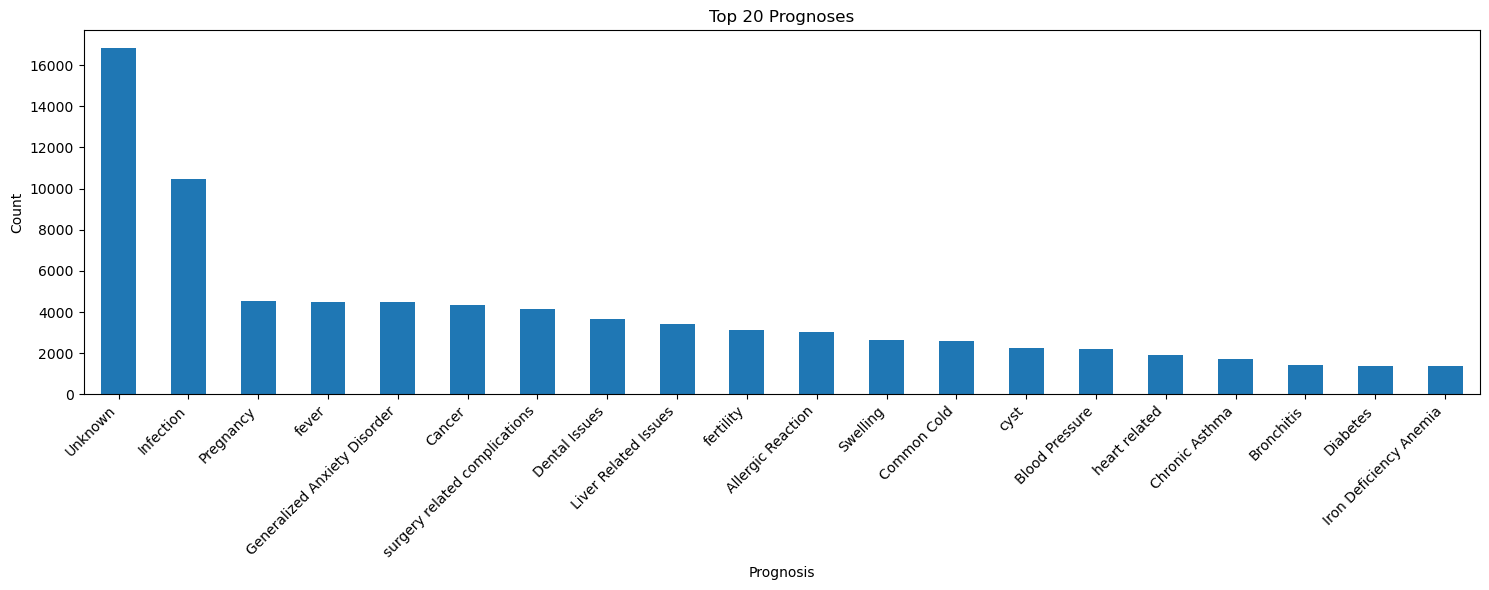

In [125]:
# Apply the function to create new column
print("Processing medical conditions...")
healthCareMagic_df['prognosis'] = healthCareMagic_df.apply(get_highest_prognosis, axis=1)

# Display summary statistics
print("\nPrognosis Distribution:")
prognosis_counts = healthCareMagic_df['prognosis'].value_counts()
print(prognosis_counts.head(20))

# Calculate percentage of specified vs unspecified
total_cases = len(healthCareMagic_df)
specified_cases = len(healthCareMagic_df[healthCareMagic_df['prognosis'] != "Unspecified"])
print(f"\nTotal cases: {total_cases}")
print(f"Cases with specific prognosis: {specified_cases}")
print(f"Percentage specified: {(specified_cases/total_cases)*100:.2f}%")

# Optional: Create visualization
plt.figure(figsize=(15, 6))
prognosis_counts.head(20).plot(kind='bar')
plt.title('Top 20 Prognoses')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [126]:
# Display only relevant columns
healthCareMagic_df[['input', 'output', 'prognosis']].head()

,input,output,prognosis
0,"I woke up this morning feeling the whole room is spinning when i was sitting down. I went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. I try to vomit but it wont come out.. After taking panadol and sleep for few hours, i still feel the same.. By the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. And it is normal stomach discomfort at the same time? Earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. Thank you doc!","Hi, Thank you for posting your query. The most likely cause for your symptoms is benign paroxysmal positional vertigo (BPPV), a type of peripheral vertigo. In this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. Accompanying nausea and vomiting are common. The condition is due to problem in the ear, and improves in a few days on own. Betahistine tablets would help relieve your symptoms. Doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. An ENT evaluation would also help. I hope it helps. Best wishes, Chat Doctor.",Vertigo
1,My baby has been pooing 5-6 times a day for a week. In the last few days it has increased to 7 and they are very watery with green stringy bits in them. He does not seem unwell i.e no temperature and still eating. He now has a very bad nappy rash from the pooing ...help!,Hi... Thank you for consulting in Chat Doctor. It seems your kid is having viral diarrhea. Once it starts it will take 5-7 days to completely get better. Unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. There is no need to use antibiotics unless there is blood in the motion. Antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. I suggest you use zinc supplements (Z&D Chat Doctor.,Diarrhea
2,"Hello, My husband is taking Oxycodone due to a broken leg/surgery. He has been taking this pain medication for one month. We are trying to conceive our second baby. Will this medication afect the fetus? Or the health of the baby? Or can it bring birth defects? Thank you.","Hello, and I hope I can help you today.First, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. Medications can only affect a fetus if you take it while pregnant. The only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like Oxycodone do not have this effect. So there is no reason for you to worry about conceiving while taking this medication. The best way you can prepare for a healthy pregnancy is to follow a well-balanced diet, limit alcohol consumption and avoid cigarette smoke, and take a daily prenatal vitamin or folic acid, as folic acid supplements in early pregnancy helps to prevent certain types of birth defects. I hope this answers your question and best wishes for your upcoming pregnancy,",fertility
3,"lump under left nipple and stomach pain (male) Hi,I have recently noticed a few weeks ago a lump under my nipple, it hurts to touch and is about the size of a quarter. Also I have bern experiencing stomach pains that prevent me from eating. I immediatly feel full and have extreme pain. Please help","HI. You have two different problems. The lump under the nipple should be removed, biopsied. This will help you to get rid of the disease, and you get a diagnosis. Second problem looks a bit serious one: Pain that prevents you from eating-immediate fullness, and extreme pain. I would advise such a patient to undergo the upper GI endoscopy asap. This can be an ulcer with a problem at the pylorus. The exact diagnosis is the most important to start the right therapy. Do not waste time in starting the therapy.",Ulcer
4,I have

In [127]:
# Create a new DataFrame with just the relevant columns
summary_df = healthCareMagic_df[['input', 'output', 'prognosis']].copy()

# Display settings for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display the DataFrame
print("\nSummary DataFrame:")
summary_df.head(40)


Summary DataFrame:


,input,output,prognosis
0,"I woke up this morning feeling the whole room is spinning when i was sitting down. I went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. I try to vomit but it wont come out.. After taking panadol and sleep for few hours, i still feel the same.. By the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. And it is normal stomach discomfort at the same time? Earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. Thank you doc!","Hi, Thank you for posting your query. The most likely cause for your symptoms is benign paroxysmal positional vertigo (BPPV), a type of peripheral vertigo. In this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. Accompanying nausea and vomiting are common. The condition is due to problem in the ear, and improves in a few days on own. Betahistine tablets would help relieve your symptoms. Doing vestibular rehabilitation or adaptation exercises would prevent the recurrence of these symptoms. An ENT evaluation would also help. I hope it helps. Best wishes, Chat Doctor.",Vertigo
1,My baby has been pooing 5-6 times a day for a week. In the last few days it has increased to 7 and they are very watery with green stringy bits in them. He does not seem unwell i.e no temperature and still eating. He now has a very bad nappy rash from the pooing ...help!,Hi... Thank you for consulting in Chat Doctor. It seems your kid is having viral diarrhea. Once it starts it will take 5-7 days to completely get better. Unless the kids having low urine output or very dull or excessively sleepy or blood in motion or green bilious vomiting...you need not worry. There is no need to use antibiotics unless there is blood in the motion. Antibiotics might worsen if unnecessarily used causing antibiotic associated diarrhea. I suggest you use zinc supplements (Z&D Chat Doctor.,Diarrhea
2,"Hello, My husband is taking Oxycodone due to a broken leg/surgery. He has been taking this pain medication for one month. We are trying to conceive our second baby. Will this medication afect the fetus? Or the health of the baby? Or can it bring birth defects? Thank you.","Hello, and I hope I can help you today.First, there is no medication that can be taken by the father that has any way to get into your system or a baby if you conceive. Medications can only affect a fetus if you take it while pregnant. The only issue is that certain medications may decrease a men sperm count and affect fertility, however pain medications like Oxycodone do not have this effect. So there is no reason for you to worry about conceiving while taking this medication. The best way you can prepare for a healthy pregnancy is to follow a well-balanced diet, limit alcohol consumption and avoid cigarette smoke, and take a daily prenatal vitamin or folic acid, as folic acid supplements in early pregnancy helps to prevent certain types of birth defects. I hope this answers your question and best wishes for your upcoming pregnancy,",fertility
3,"lump under left nipple and stomach pain (male) Hi,I have recently noticed a few weeks ago a lump under my nipple, it hurts to touch and is about the size of a quarter. Also I have bern experiencing stomach pains that prevent me from eating. I immediatly feel full and have extreme pain. Please help","HI. You have two different problems. The lump under the nipple should be removed, biopsied. This will help you to get rid of the disease, and you get a diagnosis. Second problem looks a bit serious one: Pain that prevents you from eating-immediate fullness, and extreme pain. I would advise such a patient to undergo the upper GI endoscopy asap. This can be an ulcer with a problem at the pylorus. The exact diagnosis is the most important to start the right therapy. Do not waste time in starting the therapy.",Ulcer
4,I have

## Try biobert on input and output columns to validate the values in the prognosis column - Ludwe

In [128]:
# show rows where prognosis is unknown
healthCareMagic_df[healthCareMagic_df['prognosis'] == 'Unknown'].head(40)

,instruction,input,output,prognosis
59,"If you are a doctor, please answer the medical questions based on the patient's description.","Hi, I have a bump on the top of my helix where usually a piercing would be, but i never had a piercing before, just informing you where this bump is. It looks like a blister, but it doesn t hurt. I don t know how long it s been there. If you could please tell me what it might be that would be great! Thank You.","Hi, Dear,Welcome with your query to Chat Doctor. Studied your query in full depth of its details. Reviewed it in context of your health concerns. Based On the facts, Dear, you need to consult Surgeon for checking other causes of such a lump. But I would alert you to rule out TB with Erythema Nodes which may be missed as a cause of such a lump on the helix. Fibro-chon Chat Doctor. This reply would help you to plan further treatment soon with your treating doctors. Best of Luck and early recovery. Welcome any further query in this regard, which would be replied in next session. Good Day!!",Unknown
191,"If you are a doctor, please answer the medical questions based on the patient's description.","Hello Doc. I am currently taking meloxicam, and was wondering, can I take tylenol for my muscle pain? I take a half of my meloxicam as needed and the last time I took one was this morning. I ve been having muscle pain on my left side about a week now and I am trying determine my pain level. Arlene","Hello, I have studied your case. Yes you can take Tylenol for muscle pain. Be aware of side effects of Tylenol. Side effects such as dizziness, Chat Doctor. You can take other opioid analgesic if pain persist for few days. Opioids may have other side effects. Hope this answers your query. If you have additional questions or follow-up queries then please do not hesitate in writing to us. I will be happy to answer your queries. Wishing you good health. Take care",Unknown
307,"If you are a doctor, please answer the medical questions based on the patient's description.",I am 19 After I donated blood i felt angry all of a sudden but i felt really light too not light headed like i could move faster and i noticed that i took notice of every thing around me like myy sense became a bit hightened from the experence should I be concerned?,"Hello, Thank you for your contact to Chat Doctor. I understand your concern. If I am your doctor I suggest you that blood donation won't cause such a reaction. We had carried out many blood donation camps from many years but we haven't find even a single case of such whicChatDoctorplaints of short leopardess. Donating a blood is a very good and noble cause. Do as much you can give. Also inspire for your known for blood donation. I will be happy to answer your further concerned can contact me. Chat Doctor. Infectious disease specialist. Thank you.",Unknown
308,"If you are a doctor, please answer the medical questions based on the patient's description.","i am from agartala, tripura. last one and half months, i am suffering from right back pain severely. whenever stand-up after sitting a long time in a chair or bed then i feel pain that my nerve is going to be hanged. after few minutes this is going to be normal. when i walking there is no pain in my right legs.i was suggested two-three doctors from orthopaedic specialist ground but no result found at all. please help me","Dear patient First of all what is your age? Have you met with accident or trauma? Any investigation done? Since back pain is for 2 months and not relieved with Chat Doctor. MRI gives details of disc, nerves and even bones. So visit a radiology center and request MRI asap. Till then start tab diclofenac plus thiocolchicoside combination twice a day for pain relief plus tab vita 12 plus pregabalin 75 mg at bedtime for 10 days. Both",Unknown
312,"If you are a doctor, please answer the medical questions based on the patient's description.","Hi my 2 year old is going for an op to remove a lump in his groin, dont kno

In [79]:
def clean_text(text):
    """Clean and preprocess text data"""
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = ' '.join(text.split())
    text = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', text)
    
    # Medical-specific replacements
    # Add more replacements. Try to double the number of replacements. Check for values less than 3-4 characters.
    medical_replacements = {
        'doc': 'doctor',
        'meds': 'medications',
        'rx': 'prescription',
        'dx': 'diagnosis',
        'temp': 'temperature',
        'bp': 'blood pressure',
        'hr': 'heart rate',
        'lab': 'laboratory',
        'med': 'medical',
        'symps': 'symptoms',
        'appt': 'appointment',
    }
    
    for old, new in medical_replacements.items():
        text = re.sub(r'\b' + old + r'\b', new, text)
    
    return text

In [80]:
def check_emergency_symptoms(symptoms):
    """Check for emergency symptoms that require immediate medical attention"""
    emergency_keywords = [
        'chest pain', 'heart attack', 'stroke', 'unconscious', 'breathing difficulty',
        'severe bleeding', 'head injury', 'suicide', 'poisoning', 'overdose'

        # go to chatgpt to get as many emergency keywords as possible. Determine level of urgency. Integrate into the codebase what level of urgency each keyword has.
    ]
    
    for keyword in emergency_keywords:
        if keyword in symptoms.lower():
            return True
    return False

def get_emergency_message():
    return """
    EMERGENCY MEDICAL ATTENTION NEEDED
    ---------------------------------
    Based on the symptoms you've described, you should seek immediate medical attention:
    
    1. Call emergency services (911 in the US) or your local emergency number
    2. Go to the nearest emergency room
    3. Do not wait for symptoms to improve on their own
    
    This is not a situation for an AI chatbot. Please seek professional medical help immediately.
    """

In [81]:
def extract_conditions_with_count(text):
    """Extract medical conditions and count their occurrences in text"""
    if not isinstance(text, str):
        return Counter()
    
    text = text.lower()
    condition_counts = Counter()
    
    for condition in medical_conditions.keys():
        matches = re.findall(r'\b' + re.escape(condition) + r'\b', text)
        if matches:
            condition_counts[condition] += len(matches)
    
    return condition_counts

In [82]:
def get_highest_prognosis(row):
    """Find the highest count condition from both input and output text"""
    combined_text = f"{row['input']} {row['output']}"
    condition_counts = extract_conditions_with_count(combined_text)
    
    if not condition_counts:
        return "Unknown"
    
    highest_condition = condition_counts.most_common(1)[0][0]
    return medical_conditions.get(highest_condition, "Unknown")


## Hyperparameter tuning - Ludwe

## Make sure to create smart features - Ludwe

In [83]:

class TextEmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.LongTensor(labels)
    
    def __len__(self):
        return len(self.embeddings)
    
    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

def create_and_save_embeddings(df, text_column, model_name="all-MiniLM-L6-v2"):
    """Create embeddings and save them to disk"""
    logger.info("Creating embeddings...")
    
    # Initialize the model
    model = SentenceTransformer(f'sentence-transformers/{model_name}')
    
    # Create embeddings
    texts = df[text_column].tolist()
    embeddings = model.encode(texts, 
                            batch_size=32, 
                            show_progress_bar=True)
    
    return embeddings

In [84]:
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, x):
        attention_weights = F.softmax(self.attention(x), dim=1)
        return torch.sum(x * attention_weights, dim=1)

class EnhancedPrognosisClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.3):
        super(EnhancedPrognosisClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.attention = AttentionLayer(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        features = self.network(x)
        attended = self.attention(features.unsqueeze(1))
        return self.classifier(attended)

In [85]:
def create_and_save_embeddings(df, text_column, model_name="all-MiniLM-L6-v2"):
    """Create embeddings and save them to disk"""
    logger.info("Creating embeddings...")
    
    # Initialize the model
    model = SentenceTransformer(f'sentence-transformers/{model_name}')
    
    # Create embeddings
    texts = df[text_column].tolist()
    embeddings = model.encode(texts, 
                            batch_size=32, 
                            show_progress_bar=True)
    
    # Save embeddings
    np.save('input_embeddings.npy', embeddings)
    
    # Add embedding index to dataframe
    df['embedding_index'] = range(len(df))
    df.to_csv('data_with_embedding_indices.csv', index=False)
    
    logger.info(f"Embeddings shape: {embeddings.shape}")
    return embeddings

In [86]:
def prepare_data(embeddings, df, test_size=0.2, val_size=0.2):
    """Prepare data for training"""
    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(df['primary_prognosis'])
    
    # Save label encoder for later use
    np.save('label_encoder_classes.npy', label_encoder.classes_)
    
    # Split data into train, validation, and test sets
    X_temp, X_test, y_temp, y_test = train_test_split(
        embeddings, labels, test_size=test_size, random_state=42, stratify=labels
    )
    
    # Further split temp data into train and validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, random_state=42, stratify=y_temp
    )
    
    # Create DataLoader objects
    train_dataset = TextEmbeddingDataset(X_train, y_train)
    val_dataset = TextEmbeddingDataset(X_val, y_val)
    test_dataset = TextEmbeddingDataset(X_test, y_test)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)
    
    return train_loader, val_loader, test_loader, label_encoder


In [87]:
def find_similar_cases(user_query, df, top_n=3):
    """Find similar cases in the dataset using TF-IDF and cosine similarity"""
    tfidf = TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1, 2)
    )
    # explore expanding the ngram range to 3 and 4. 
    # explore the use if fuzzy wuzzy to improve the results.
    all_inputs = df['input'].tolist()
    all_inputs.append(user_query)
    
    tfidf_matrix = tfidf.fit_transform(all_inputs)
    query_vec = tfidf_matrix[-1]
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix[:-1])
    
    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]
    
    return df.iloc[top_indices], similarity_scores[0][top_indices]

In [88]:
class PrognosisClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.3): # play around with the dropout rate and hidden dim 
        super(PrognosisClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim // 2, output_dim)
        )
    
    def forward(self, x):
        return self.network(x)

In [89]:
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )
    
    def forward(self, x):
        attention_weights = F.softmax(self.attention(x), dim=1)
        return torch.sum(x * attention_weights, dim=1)

class EnhancedPrognosisClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.3):
        super(EnhancedPrognosisClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.attention = AttentionLayer(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        features = self.network(x)
        attended = self.attention(features.unsqueeze(1))
        return self.classifier(attended)

In [90]:
def generate_medical_response(user_symptoms):
    """Generate medical response based on user symptoms"""
    try:
        # Check for emergency symptoms first
        if check_emergency_symptoms(user_symptoms):
            return get_emergency_message()
        
        # Clean user input
        cleaned_symptoms = clean_text(user_symptoms)
        
        # Extract potential conditions from user symptoms
        user_conditions = enhance_medical_condition_extraction(cleaned_symptoms)
        
        # Find similar cases
        similar_cases, similarity_scores = find_similar_cases(cleaned_symptoms, healthCareMagic_df)
        
        # Generate response
        response = "Based on your symptoms, here's my analysis:\n\n"
        
        # Add extracted conditions if any
        if user_conditions:
            response += "Potential Conditions Identified:\n"
            response += ", ".join(user_conditions) + "\n\n"
        
        # Add responses from similar cases
        response += "Relevant Medical Advice:\n"
        for (_, case), similarity in zip(similar_cases.iterrows(), similarity_scores):
            if similarity > 0.2:  # Threshold for relevance
                response += f"\nRelevant Case (Similarity: {similarity:.2f}):\n"
                response += f"Condition(s): {case['prognosis']}\n"
                response += f"Medical Advice: {case['output']}\n"
        
        # Add disclaimer
        response += "\nIMPORTANT DISCLAIMER:\n"
        response += "- This is an AI-generated response based on similar medical cases.\n"
        response += "- This should not be considered as professional medical advice.\n"
        response += "- Please consult with a qualified healthcare provider for proper diagnosis and treatment.\n"
        
        return response
    
    except Exception as e:
        return f"An error occurred while analyzing your symptoms: {str(e)}"

In [91]:
def interactive_medical_consultant():
    """Interactive medical consultation interface"""
    print("\nMedical Symptom Consultant")
    print("-------------------------")
    print("Please describe your symptoms in detail.")
    print("Type 'quit' to exit.")
    
    while True:
        try:
            user_input = input("\nDescribe your symptoms: ").strip()
            
            if user_input.lower() in ['quit', 'exit', 'bye']:
                print("\nThank you for using the Medical Symptom Consultant. Take care!")
                break
            
            if len(user_input) < 10:
                print("Please provide more details about your symptoms for better analysis.")
                continue
            
            response = generate_medical_response(user_input)
            print("\n", response)
            
        except Exception as e:
            print(f"\nAn error occurred: {str(e)}")
            print("Please try again or seek medical attention if you're concerned.")

# Process the dataset with prognosis extraction
print("Processing healthcare dataset...")
healthCareMagic_df = create_enhanced_prognosis_column(healthCareMagic_df)

# Display some statistics
print("\nDataset Statistics:")
print(f"Total number of cases: {len(healthCareMagic_df)}")
print("\nTop 10 most common conditions:")
print(healthCareMagic_df['prognosis'].value_counts().head(10))

# Start the interactive consultant
if __name__ == "__main__":
    interactive_medical_consultant()

Processing healthcare dataset...


NameError: name 'create_enhanced_prognosis_column' is not defined

In [ ]:
def train_model(model, train_loader, val_loader, num_epochs=10):
    """Train the model"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    logger.info(f"Using device: {device}")
    
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())
    
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        train_steps = 0
        
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()
            train_steps += 1
        
        avg_train_loss = total_train_loss / train_steps
        
        # Validation phase
        model.eval()
        total_val_loss = 0
        val_steps = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                total_val_loss += loss.item()
                val_steps += 1
        
        avg_val_loss = total_val_loss / val_steps
        
        logger.info(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")
        
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')
    
    return model

In [ ]:
def evaluate_model(model, test_loader, criterion, device):
    """Evaluate model performance"""
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            predictions.extend(outputs.argmax(dim=1).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    
    accuracy = accuracy_score(true_labels, predictions)
    report = classification_report(true_labels, predictions)
    
    return total_loss / len(test_loader), accuracy, report

In [ ]:
def predict_prognosis(text, model, tokenizer, label_encoder):
    """Predict prognosis for new text"""
    # Preprocess input text
    clean_text = preprocess_text(text)
    
    # Create embedding
    embedding = create_embedding(clean_text)
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        output = model(torch.FloatTensor(embedding))
        predicted_idx = output.argmax(dim=1).item()
        predicted_label = label_encoder.inverse_transform([predicted_idx])[0]
    
    return predicted_label

In [ ]:
def main():
    # Create embeddings
    embeddings = create_and_save_embeddings(healthCareMagic_df, 'clean_input')
    
    # Prepare data
    train_loader, val_loader, test_loader, label_encoder = prepare_data(embeddings, healthCareMagic_df)
    
    # Initialize enhanced model
    input_dim = embeddings.shape[1]
    hidden_dim = 256
    output_dim = len(label_encoder.classes_)
    model = EnhancedPrognosisClassifier(input_dim, hidden_dim, output_dim)
    
    # Train model
    model = train_model(model, train_loader, val_loader)
    
    # Evaluate model
    criterion = nn.CrossEntropyLoss()
    test_loss, accuracy, report = evaluate_model(model, test_loader, criterion, device)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Save model and components
    torch.save({
        'model_state_dict': model.state_dict(),
        'input_dim': input_dim,
        'hidden_dim': hidden_dim,
        'output_dim': output_dim,
        'label_encoder_classes': label_encoder.classes_
    }, 'enhanced_medical_chatbot_model.pth')

if __name__ == "__main__":
    main()

## Keras Tuner and Torch Tuner for tuning the parameters of the model. LOOK INTO TUNING THE MODEL.